In [10]:
import matplotlib.pyplot as plt

In [11]:
from string import Template

import numpy as np

import getpass

from kgforge.core import KnowledgeGraphForge

In [12]:
def vectors_to_resources(forge, vectors, resources, model_id):
    jsons = []
    for i, v in enumerate(vectors):
        json_repr = {
            "@type": ["Entity", "Embedding"],
            "derivation": {
                "@type": "Derivation",
                "entity": {
                  "@id": resources[i],
                  "@type": "Entity"
                }
            },
            "embedding": v.tolist(),
            "generation": {
                "@type": "Generation",
                "activity": {
                  "@type": [
                    "Activity",
                    "EmbeddingActivity"
                  ],
                  "used": {
                    "@id": model_id,
                    "@type": "EmbeddingModel",
                  }
                }
            },
            "name": f"Embedding of {resources[i]}"
        }
        jsons.append(json_repr)
    return forge.from_json(jsons)

In [13]:
TOKEN = getpass.getpass()

········


In [14]:
forge = KnowledgeGraphForge(
    "../dataset-embeddings/configs/new-forge-config.yaml",
    endpoint="https://staging.nexus.ocp.bbp.epfl.ch/v1",
    token=TOKEN, 
    bucket="dke/inference-test")

## Populate brain regions

In [214]:
brain_region = {
  "@context": "https://neuroshapes.org",
  "@id": "https://neuroshapes.org/BrainRegion",
  "@type": "Class",
  "altLabel": "regional part of the brain",
  "definition": "Anatomical divisons of the brain according to one or more criteria, e.g. cytoarchitectural, gross anatomy. Parts may be contiguous in 3D or not, e.g., basal ganglia.",
  "isDefinedBy": "https://bbp.epfl.ch/ontologies/core/bmo",
  "label": "Brain Region",
}
isocortex = {
  "@id": "http://api.brain-map.org/api/v2/data/Structure/315",
  "@type": "Class",
  "atlas_id": 746,
  "color_hex_triplet": "70FF71",
  "graph_order": 5,
  "hemisphere_id": 3,
  "identifier": "315",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mba",
  "isPartOf": "mba:695",
  "label": "Isocortex",
  "notation": "Isocortex",
  "prefLabel": "Isocortex",
  "st_level": 5,
  "subClassOf": "https://neuroshapes.org/BrainRegion"
}

ILA = {
  "@id": "http://api.brain-map.org/api/v2/data/Structure/44",
  "@type": "Class",
  "atlas_id": 146,
  "color_hex_triplet": "59B363",
  "graph_order": 245,
  "hemisphere_id": 3,
  "identifier": "44",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mba",
  "isPartOf": "http://api.brain-map.org/api/v2/data/Structure/315",
  "label": "Infralimbic area",
  "notation": "ILA",
  "prefLabel": "Infralimbic area",
  "st_level": 8,
  "subClassOf": "nsg:BrainRegion"
}

PTLp = {
  "@id": "http://api.brain-map.org/api/v2/data/Structure/22",
  "@type": "Class",
  "atlas_id": 285,
  "color_hex_triplet": "009FAC",
  "graph_order": 339,
  "hemisphere_id": 3,
  "identifier": "22",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mba",
  "isPartOf": "http://api.brain-map.org/api/v2/data/Structure/315",
  "label": "Posterior parietal association areas",
  "notation": "PTLp",
  "prefLabel": "Posterior parietal association areas",
  "st_level": 6,
  "subClassOf": "nsg:BrainRegion"
}

ACA = {
  "@id": "http://api.brain-map.org/api/v2/data/Structure/31",
  "@type": "Class",
  "atlas_id": 3,
  "color_hex_triplet": "40A666",
  "graph_order": 220,
  "hemisphere_id": 3,
  "identifier": "31",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mba",
  "isPartOf": "http://api.brain-map.org/api/v2/data/Structure/315",
  "label": "Anterior cingulate area",
  "notation": "ACA",
  "prefLabel": "Anterior cingulate area",
  "st_level": 8,
  "subClassOf": "nsg:BrainRegion"
}

ACAv = {
  "@id": "http://api.brain-map.org/api/v2/data/Structure/48",
  "@type": "Class",
  "atlas_id": 5,
  "color_hex_triplet": "40A666",
  "graph_order": 232,
  "hemisphere_id": 3,
  "identifier": "48",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mba",
  "isPartOf": "http://api.brain-map.org/api/v2/data/Structure/31",
  "label": "Anterior cingulate area, ventral part",
  "notation": "ACAv",
  "prefLabel": "Anterior cingulate area, ventral part",
  "st_level": 9,
  "subClassOf": "nsg:BrainRegion"
}

thalamus = {
  "@id": "http://api.brain-map.org/api/v2/data/Structure/549",
  "@type": "Class",
  "atlas_id": 351,
  "color_hex_triplet": "FF7080",
  "graph_order": 641,
  "hemisphere_id": 3,
  "identifier": "549",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mba",
  "isPartOf": "mba:1129",
  "label": "Thalamus",
  "notation": "TH",
  "prefLabel": "Thalamus",
  "st_level": 5,
  "subClassOf": "nsg:BrainRegion"
}

<count> 6
<action> _register_many
<succeeded> True


In [ ]:
# brain_region_resources = [brain_region, thalamus, isocortex, ILA, PTLp, ACA, ACAv]
# forge.register(forge.from_json(brain_region_resources))

In [294]:
model_id = "https://bbp.epfl.ch/neurosciencegraph/data/BrainRegionEmbeddingModel"
brain_region_model = {
    "@id": model_id,
    "@type": "EmbeddingModel",
    "name": "Brain Region Hierarchical Embedding Model",
    "prefLabel": "Brain region model",
    "similarity": "euclidean",
    "vectorDimension": 2
}

In [281]:
forge.register(forge.from_json(brain_region_model))

<action> _register_one
<succeeded> True


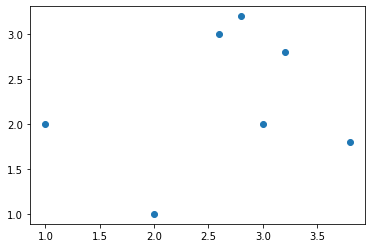

In [282]:
regions = [
    "https://neuroshapes.org/BrainRegion",
    "http://api.brain-map.org/api/v2/data/Structure/315",
    "http://api.brain-map.org/api/v2/data/Structure/44", 
    "http://api.brain-map.org/api/v2/data/Structure/22",
    "http://api.brain-map.org/api/v2/data/Structure/31",
    "http://api.brain-map.org/api/v2/data/Structure/48",
    "http://api.brain-map.org/api/v2/data/Structure/549"
]
region_embeddings = np.array([
    [2, 1],
    [3, 2],
    [3.2, 2.8], 
    [3.8, 1.8],
    [2.8, 3.2],
    [2.6, 3],
    [1, 2]
])
plt.scatter(region_embeddings[:, 0], region_embeddings[:, 1])
plt.show()

In [289]:
resources = vectors_to_resources(
    forge, region_embeddings, regions, model_id)
forge.register(resources)
forge.tag(resources, model_id.split("/")[-1])

<count> 7
<action> _register_many
<succeeded> True


## Populate MTypes

In [226]:
mtype = {
  "@id": "https://neuroshapes.org/MType",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "Neuron Morphological Type",
}

pc = {
  "@id": "https://neuroshapes.org/PyramidalNeuron",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "Pyramidal neuron",
  "notation": "Pyr",
  "prefLabel": "Pyramidal neuron",
  "subClassOf": "https://neuroshapes.org/MType"
}

tpc = {
  "@id": "https://neuroshapes.org/TufterdPyramidalNeuron",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "Tufterd Pyramidal Neuron",
  "notation": "TPyr",
  "prefLabel": "Tufterd Pyramidal Neuron",
  "subClassOf": "https://neuroshapes.org/PyramidalNeuron"
}

upc = {
  "@id": "https://neuroshapes.org/UntufterdPyramidalNeuron",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "Untufterd Pyramidal Neuron",
  "notation": "UPyr",
  "prefLabel": "Untufterd Pyramidal Neuron",
  "subClassOf": "https://neuroshapes.org/PyramidalNeuron"
}

l5_upc = {
  "@id": "http://uri.interlex.org/base/ilx_0381371",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "L5_UPC",
  "notation": "L5_UPC",
  "prefLabel": "Layer 5 Untufted Pyramidal Cell",
  "subClassOf": "https://neuroshapes.org/UntufterdPyramidalNeuron"
}

l6_upc = {
  "@id": "http://uri.interlex.org/base/ilx_0381377",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "L6_UPC",
  "notation": "L6_UPC",
  "prefLabel": "Layer 6 Untufted Pyramidal Cell",
  "subClassOf": "https://neuroshapes.org/UntufterdPyramidalNeuron"
}


mc = {
  "@id": "https://neuroshapes.org/MartinottiCell",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "Martinotti Cell",
  "notation": "MC",
  "prefLabel": "Martinotti Cell",
  "subClassOf": "https://neuroshapes.org/MType"
}

vpl_in = {
  "@id": "http://uri.interlex.org/base/ilx_0738235",
  "@type": "Class",
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/mtypes",
  "label": "VPL_IN",
  "notation": "VPL_IN",
  "prefLabel": "Ventral posterolateral nucleus of the thalamus interneuron",
  "subClassOf": "https://neuroshapes.org/MType"
}

In [222]:
# mtype_resources = [mtype, pc, mc, upc, tpc, l5_upc, l6_upc]
# forge.register(forge.from_json(mtype_resources))

<count> 6
<action> _register_many
<succeeded> True


In [301]:
model_id = "https://bbp.epfl.ch/neurosciencegraph/data/MTypeEmbeddingModel"
mtype_model = {
    "@id": model_id,
    "@type": "EmbeddingModel",
    "name": "MType Embedding Model",
    "prefLabel": "MType model",
    "similarity": "euclidean",
    "vectorDimension": 2
}

In [292]:
forge.register(forge.from_json(mtype_model))

<action> _register_one
<succeeded> True


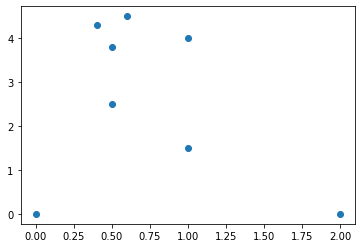

In [260]:
mtypes = [
    "https://neuroshapes.org/MType",
    "https://neuroshapes.org/PyramidalNeuron",
    "https://neuroshapes.org/TufterdPyramidalNeuron", 
    "https://neuroshapes.org/UntufterdPyramidalNeuron",
    "http://uri.interlex.org/base/ilx_0381371",
    "http://uri.interlex.org/base/ilx_0381377",
    "https://neuroshapes.org/MartinottiCell",
    "http://uri.interlex.org/base/ilx_0738235"
]
mtype_embeddings = np.array([
    [0, 0],
    [0.5, 2.5],
    [1, 4],
    [0.5, 3.8],
    [0.4, 4.3],
    [0.6, 4.5],
    [1, 1.5],
    [2, 0]
])
plt.scatter(mtype_embeddings[:, 0], mtype_embeddings[:, 1])
plt.show()

In [293]:
resources = vectors_to_resources(
    forge, mtype_embeddings, mtypes, model_id)
forge.register(resources)
forge.tag(resources, model_id.split("/")[-1])

<count> 8
<action> _register_many
<succeeded> True


## Add species

In [309]:
species = {
  "@id": "https://neuroshapes.org/Species",
  "@type": "Class",
  "http://purl.obolibrary.org/obo/ncbitaxon#has_rank": {
    "@id": "http://purl.obolibrary.org/obo/NCBITaxon_species"
  },
  "isDefinedBy": "http://bbp.epfl.ch/neurosciencegraph/ontologies/speciestaxonomy/",
  "label": "Species",
  "subClassOf": "prov:Entity"
}

mus = {
  "@id": "http://purl.obolibrary.org/obo/NCBITaxon_10090",
  "@type": "Class",
  "isDefinedBy": "https://bbp.epfl.ch/ontologies/core/molecular-systems",
  "label": "Mus musculus",
  "subClassOf": "nsg:Species"
}
forge.register(forge.from_json([species]))

<count> 1
<action> _register_many
<succeeded> True


## Add traces and morphologies

In [327]:
trace_config = [
    ("http://uri.interlex.org/base/ilx_0381371", "L5_UPC", "http://api.brain-map.org/api/v2/data/Structure/48", "ACAv", "http://purl.obolibrary.org/obo/NCBITaxon_10090", "Mus musculus"),
    ("http://uri.interlex.org/base/ilx_0381377",  "L6_UPC", "http://api.brain-map.org/api/v2/data/Structure/44", "ILA", "http://purl.obolibrary.org/obo/NCBITaxon_10090", "Mus musculus"),
    ("https://neuroshapes.org/TufterdPyramidalNeuron", "TPC", "http://api.brain-map.org/api/v2/data/Structure/22", "PTLp", "http://purl.obolibrary.org/obo/NCBITaxon_10090", "Mus musculus"),
    ("http://uri.interlex.org/base/ilx_0738235",  "VPL_IN", "http://api.brain-map.org/api/v2/data/Structure/549", "Thalamus", "http://purl.obolibrary.org/obo/NCBITaxon_10090", "Mus musculus"),
    ("https://neuroshapes.org/MartinottiCell", "Martinotti Cell", "http://api.brain-map.org/api/v2/data/Structure/22", "PTLp", "http://purl.obolibrary.org/obo/NCBITaxon_10090", "Mus musculus")
]

In [328]:
trace_resource_ids = []
for mtype_id, mtype_label, region_id, region_label, species_id, species_label in trace_config:
    trace = {
      "@type": [
        "Trace",
        "Dataset",
        "Entity"
      ],
      "annotation": {
        "@type": [
          "Annotation",
          "MType:Annotation"
        ],
        "hasBody": {
          "@id": mtype_id,
          "@type": [
            "MType",
            "AnnotationBody"
          ],
          "label": mtype_label
        },
        "name": "M-type Annotation"
      },
      "brainLocation": {
        "@type": "BrainLocation",
        "brainRegion": {
          "@id": region_id,
          "label": region_label
        }
      },
      "subject": {
        "@type": "Subject",
        "species": {
          "@id": species_id,
          "label": species_label
        }
      }
    }
    resource = forge.from_json(trace)
    forge.register(resource)
    trace_resource_ids.append(resource.id)

<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True


In [332]:
model_id = "https://bbp.epfl.ch/neurosciencegraph/data/TraceEmbeddingModel"
trace_model = {
    "@id": model_id,
    "@type": "EmbeddingModel",
    "name": "Trace Embedding Model",
    "prefLabel": "Trace model",
    "similarity": "euclidean",
    "vectorDimension": 2
}

In [333]:
forge.register(forge.from_json(trace_model))

<action> _register_one
<succeeded> True


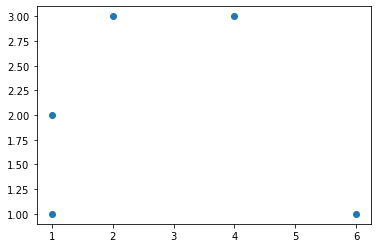

In [334]:
trace_embeddings = np.array([
    [1, 1],
    [1, 2],
    [2, 3],
    [6, 1],
    [4, 3]
])
plt.scatter(trace_embeddings[:, 0], trace_embeddings[:, 1])
plt.show()

In [335]:
resources = vectors_to_resources(
    forge, trace_embeddings, trace_resource_ids, model_id)
forge.register(resources)
forge.tag(resources, model_id.split("/")[-1])

<count> 5
<action> _register_many
<succeeded> True
<count> 5
<action> _tag_many
<succeeded> True


In [330]:
morph_resource_ids = []
for mtype_id, mtype_label, region_id, region_label, species_id, species_label in trace_config:
    trace = {
      "@type": [
        "NeuronMorphology",
        "Dataset",
        "Entity"
      ],
      "annotation": {
        "@type": [
          "Annotation",
          "MType:Annotation"
        ],
        "hasBody": {
          "@id": mtype_id,
          "@type": [
            "MType",
            "AnnotationBody"
          ],
          "label": mtype_label
        },
        "name": "M-type Annotation"
      },
      "brainLocation": {
        "@type": "BrainLocation",
        "brainRegion": {
          "@id": region_id,
          "label": region_label
        }
      },
      "subject": {
        "@type": "Subject",
        "species": {
          "@id": species_id,
          "label": species_label
        }
      }
    }
    resource = forge.from_json(trace)
    forge.register(resource)
    morph_resource_ids.append(resource.id)

<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True
<action> _register_one
<succeeded> True


In [336]:
model_id = "https://bbp.epfl.ch/neurosciencegraph/data/NeuronMorphologyEmbeddingModel"
morph_model = {
    "@id": model_id,
    "@type": "EmbeddingModel",
    "name": "NeuronMorphology Embedding Model",
    "prefLabel": "NeuronMorphology model",
    "similarity": "euclidean",
    "vectorDimension": 2
}

In [337]:
forge.register(forge.from_json(morph_model))

<action> _register_one
<succeeded> True


In [338]:
resources = vectors_to_resources(
    forge, trace_embeddings, morph_resource_ids, model_id)
forge.register(resources)
forge.tag(resources, model_id.split("/")[-1])

<count> 5
<action> _register_many
<succeeded> True
<count> 5
<action> _tag_many
<succeeded> True


## Create recommender configuration resource

In [17]:
config_resources = [
    {
      "@id": "https://bbp.epfl.ch/neurosciencegraph/data/ontology-class-recommender-config",
      "@type": "RecommenderConfiguration",
      "configuration": [
            {
              "embeddingModel": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/BrainRegionEmbeddingModel",
                "@type": "EmbeddingModel"
              },
              "similarityView": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/brain-region-embedding-view",
                "@type": "ElasticSearchView"
              },
            },
            {
              "embeddingModel": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/MTypeEmbeddingModel",
                "@type": "EmbeddingModel"
              },
              "similarityView": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/mtype-embedding-view",
                "@type": "ElasticSearchView"
              },
            }
      ],
      "resourceTypes": ["http://www.w3.org/2002/07/owl#Class"]
    },
    {
      "@id": "https://bbp.epfl.ch/neurosciencegraph/data/morph-recommender-config",
      "@type": "RecommenderConfiguration",
      "configuration": [
            {
              "embeddingModel": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/NeuronMorphologyEmbeddingModel",
                "@type": "EmbeddingModel"
              },
              "similarityView": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/morphology-embedding-view",
                "@type": "ElasticSearchView"
              },
            }
      ],
      "resourceTypes": ["https://neuroshapes.org/NeuronMorphology"]
    },
    {
      "@id": "https://bbp.epfl.ch/neurosciencegraph/data/trace-recommender-config",
      "@type": "RecommenderConfiguration",
      "configuration": [
            {
              "embeddingModel": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/TraceEmbeddingModel",
                "@type": "EmbeddingModel"
              },
              "similarityView": {
                "@id": "https://bbp.epfl.ch/neurosciencegraph/data/trace-embedding-view",
                "@type": "ElasticSearchView"
              },
            }
      ],
      "resourceTypes": ["https://neuroshapes.org/Trace"]
    }
]

In [16]:
forge.register(forge.from_json(config_resources))

<count> 4
<action> _register_many
<succeeded> True
